In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = {
    'Model': [
        'XGBoost', 'Disparate_Impact_Remover', 'LFR', 'reweighing', 'GerryFair',
        'AdversarialDebiasing', 'CalibratedEqOdds', 'EqualizedOdds', 'ExponentiatedGradient',
        'GridSearch', 'PrejudiceRemover', 'RejectOptionClassification'
    ],
    'Avg Accuracy': [
        0.9056, 0.9045, 0.9989, 0.9050, 0.8458,
        0.8916, 0.6007, 0.8963, 0.8914, 0.8910,
        0.6000, 0.5953
    ],
    'Avg Disparate Impact': [
        0.9738, 0.9776, 0.9406, 0.9756, 0.9725,
        0.9470, 1.0060, 0.9993, 0.9582, 0.9773,
        0.6547, 707.1955  # <- note RejectOptionClassification is insanely high
    ],
    'Avg Statistical Parity Diff': [
        -0.0232, -0.0210, -0.0546, -0.0210, -0.0270,
        -0.0435, -0.0561, -0.0022, -0.0353, -0.0185,
        -0.0114, 0.0032
    ],
    'Avg Equal Opportunity Diff': [
        -0.0192, -0.0163, 0.0010, -0.0167, -0.0127,
        -0.0368, -0.0281, -0.0010, -0.0330, -0.0233,
        -0.0262, -0.0031
    ]
}

df = pd.DataFrame(data)

In [5]:
##Accuracy

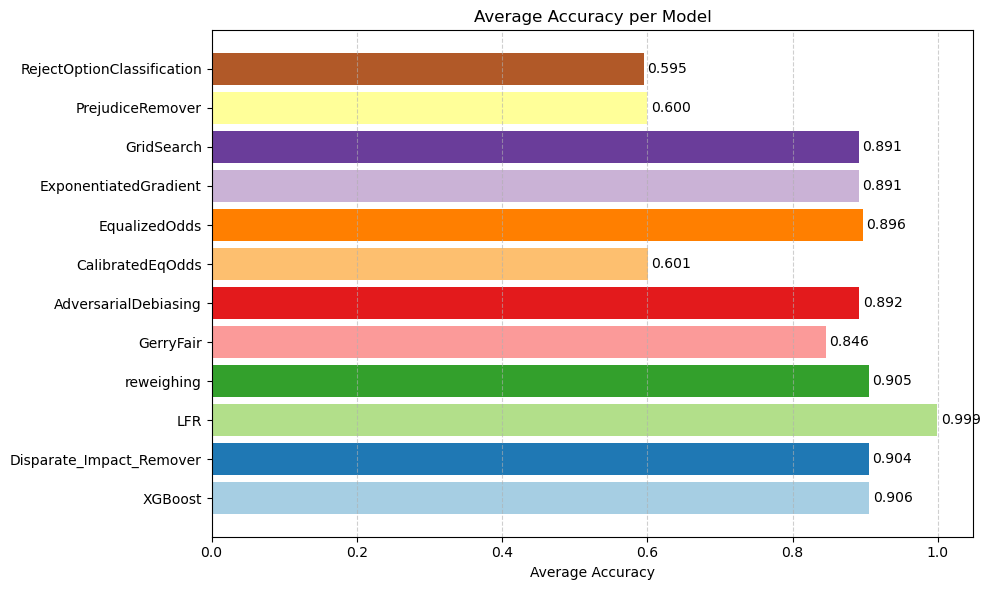

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(df['Model'], df['Avg Accuracy'], color=plt.cm.Paired.colors)
plt.xlabel('Average Accuracy')
plt.title('Average Accuracy per Model')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for i, (score, name) in enumerate(zip(df['Avg Accuracy'], df['Model'])):
    plt.text(score + 0.005, i, f'{score:.3f}', va='center')

plt.tight_layout()
plt.show()

In [17]:
##Disparate Impact

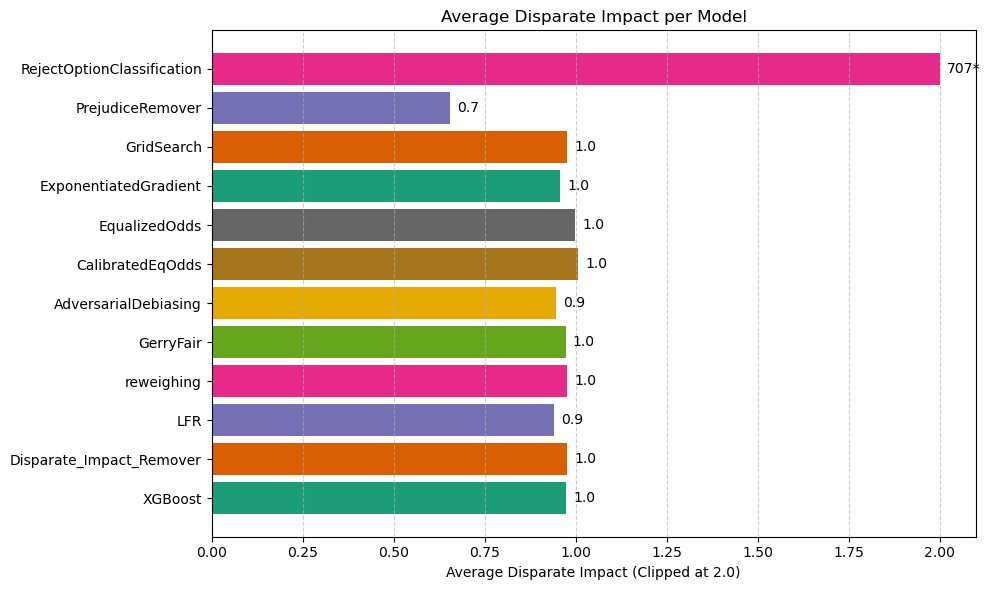

In [21]:
df['DI Clipped'] = df['Avg Disparate Impact'].apply(lambda x: min(x, 2.0))

plt.figure(figsize=(10, 6))
plt.barh(df['Model'], df['DI Clipped'], color=plt.cm.Dark2.colors)
plt.xlabel('Average Disparate Impact (Clipped at 2.0)')
plt.title('Average Disparate Impact per Model')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for i, (actual, clipped) in enumerate(zip(df['Avg Disparate Impact'], df['DI Clipped'])):
    label = f'{actual:.1f}' if actual <= 2.0 else f'{actual:.0f}*'
    plt.text(clipped + 0.02, i, label, va='center')

plt.tight_layout()
plt.show()

In [11]:
##Statistical Parity Difference

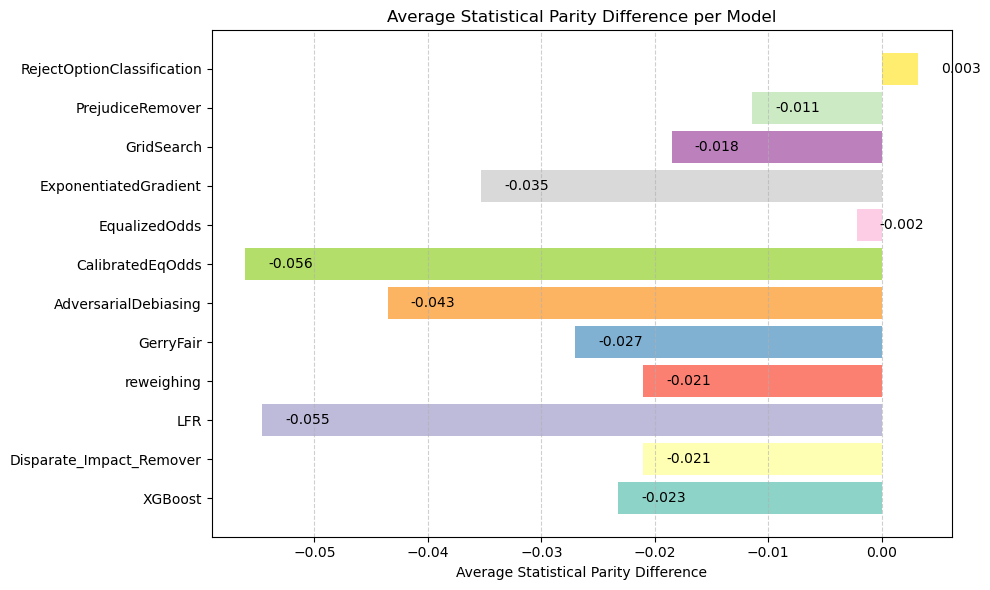

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(df['Model'], df['Avg Statistical Parity Diff'], color=plt.cm.Set3.colors)
plt.xlabel('Average Statistical Parity Difference')
plt.title('Average Statistical Parity Difference per Model')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate values
for i, (score, name) in enumerate(zip(df['Avg Statistical Parity Diff'], df['Model'])):
    plt.text(score + 0.002, i, f'{score:.3f}', va='center')

plt.tight_layout()
plt.show()

In [23]:
##Equal Opportunity Difference

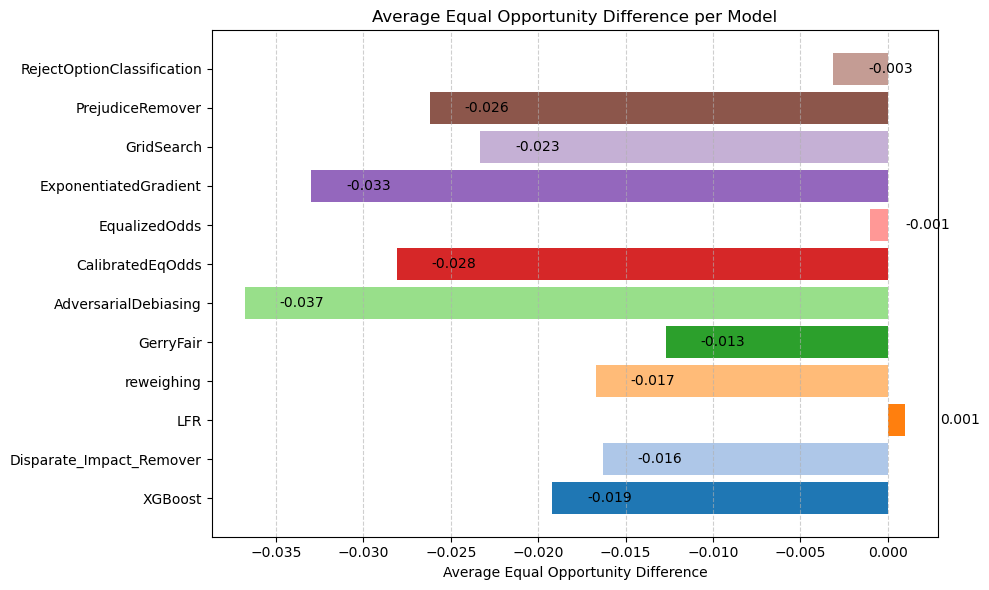

In [25]:
plt.figure(figsize=(10, 6))
plt.barh(df['Model'], df['Avg Equal Opportunity Diff'], color=plt.cm.tab20.colors)
plt.xlabel('Average Equal Opportunity Difference')
plt.title('Average Equal Opportunity Difference per Model')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate values
for i, (score, name) in enumerate(zip(df['Avg Equal Opportunity Diff'], df['Model'])):
    plt.text(score + 0.002, i, f'{score:.3f}', va='center')

plt.tight_layout()
plt.show()

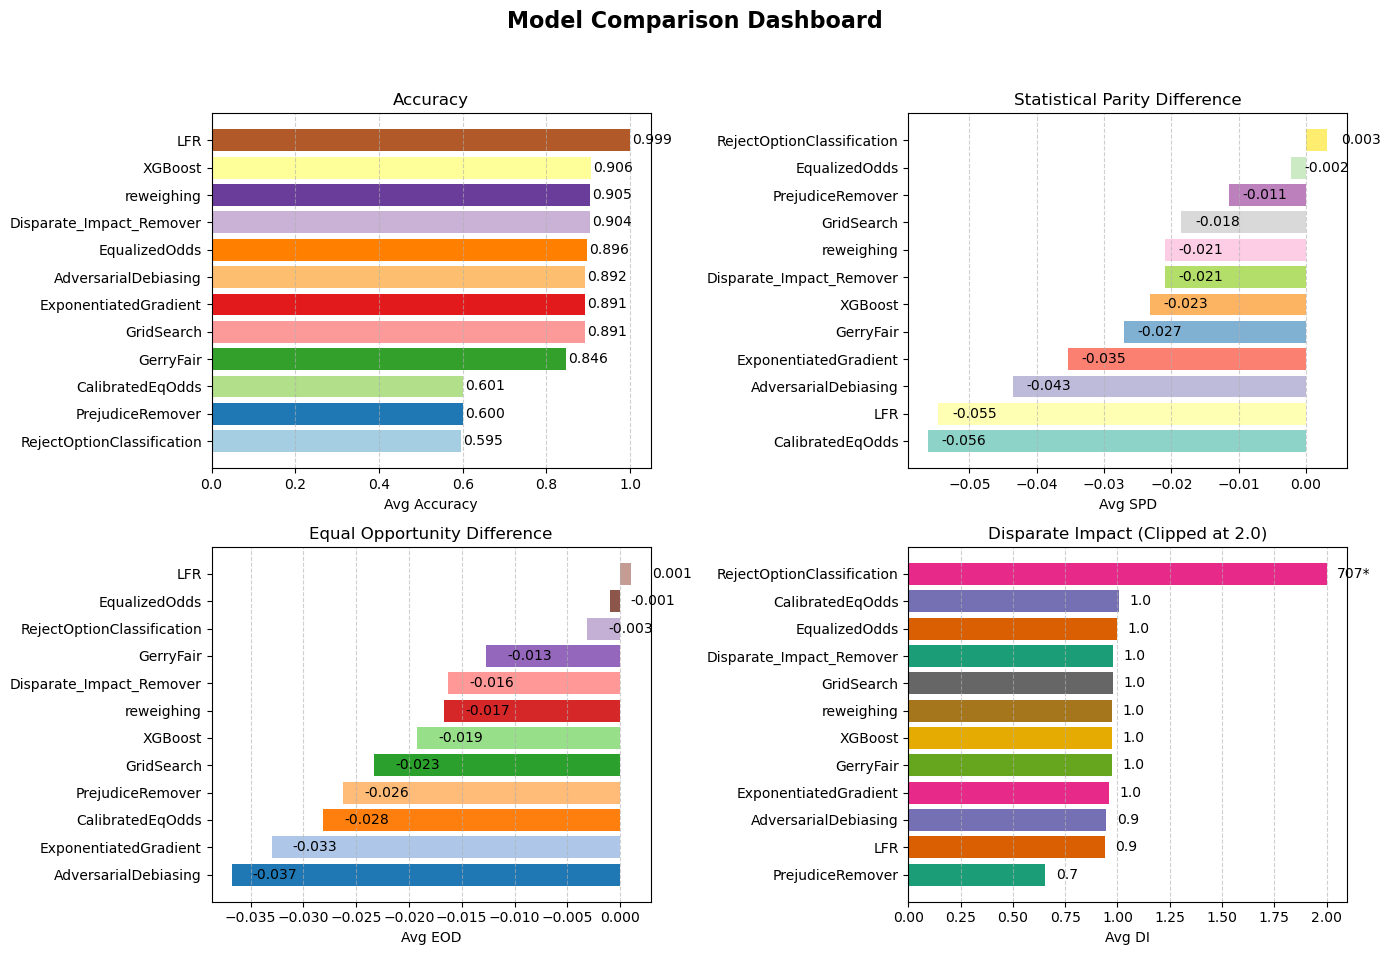

In [27]:
df['DI Clipped'] = df['Avg Disparate Impact'].apply(lambda x: min(x, 2.0))

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Comparison Dashboard', fontsize=16, fontweight='bold')

# 1. Accuracy
df_sorted_acc = df.sort_values('Avg Accuracy')
axs[0, 0].barh(df_sorted_acc['Model'], df_sorted_acc['Avg Accuracy'], color=plt.cm.Paired.colors)
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Avg Accuracy')
axs[0, 0].grid(axis='x', linestyle='--', alpha=0.6)
for i, (v, m) in enumerate(zip(df_sorted_acc['Avg Accuracy'], df_sorted_acc['Model'])):
    axs[0, 0].text(v + 0.005, i, f'{v:.3f}', va='center')

# 2. Disparate Impact (clipped)
df_sorted_di = df.sort_values('DI Clipped')
axs[1, 1].barh(df_sorted_di['Model'], df_sorted_di['DI Clipped'], color=plt.cm.Dark2.colors)
axs[1, 1].set_title('Disparate Impact (Clipped at 2.0)')
axs[1, 1].set_xlabel('Avg DI')
axs[1, 1].grid(axis='x', linestyle='--', alpha=0.6)
for i, (actual, clipped) in enumerate(zip(df_sorted_di['Avg Disparate Impact'], df_sorted_di['DI Clipped'])):
    label = f'{actual:.1f}' if actual <= 2.0 else f'{actual:.0f}*'
    axs[1, 1].text(clipped + 0.05, i, label, va='center')

# 3. SPD
df_sorted_spd = df.sort_values('Avg Statistical Parity Diff')
axs[0, 1].barh(df_sorted_spd['Model'], df_sorted_spd['Avg Statistical Parity Diff'], color=plt.cm.Set3.colors)
axs[0, 1].set_title('Statistical Parity Difference')
axs[0, 1].set_xlabel('Avg SPD')
axs[0, 1].grid(axis='x', linestyle='--', alpha=0.6)
for i, (v, m) in enumerate(zip(df_sorted_spd['Avg Statistical Parity Diff'], df_sorted_spd['Model'])):
    axs[0, 1].text(v + 0.002, i, f'{v:.3f}', va='center')

# 4. EOD
df_sorted_eod = df.sort_values('Avg Equal Opportunity Diff')
axs[1, 0].barh(df_sorted_eod['Model'], df_sorted_eod['Avg Equal Opportunity Diff'], color=plt.cm.tab20.colors)
axs[1, 0].set_title('Equal Opportunity Difference')
axs[1, 0].set_xlabel('Avg EOD')
axs[1, 0].grid(axis='x', linestyle='--', alpha=0.6)
for i, (v, m) in enumerate(zip(df_sorted_eod['Avg Equal Opportunity Diff'], df_sorted_eod['Model'])):
    axs[1, 0].text(v + 0.002, i, f'{v:.3f}', va='center')


# Final layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [29]:
##Responsibility Score

🔵 Average Responsibility Score (RS) per Model:
                           Model    RS_Avg
0                            LFR  0.912050
1                 Equalized Odds  0.774675
2                    Grid Search  0.771225
3       Disparate Impact Remover  0.741975
4         Exponentiated Gradient  0.733350
5                     Reweighing  0.667625
6          Adversarial Debiasing  0.654375
7                      GerryFair  0.616500
8                        XGBoost  0.615025
9              Prejudice Remover  0.559300
10  Reject Option Classification  0.521225
11    Caliberated Equalized Odds  0.188700


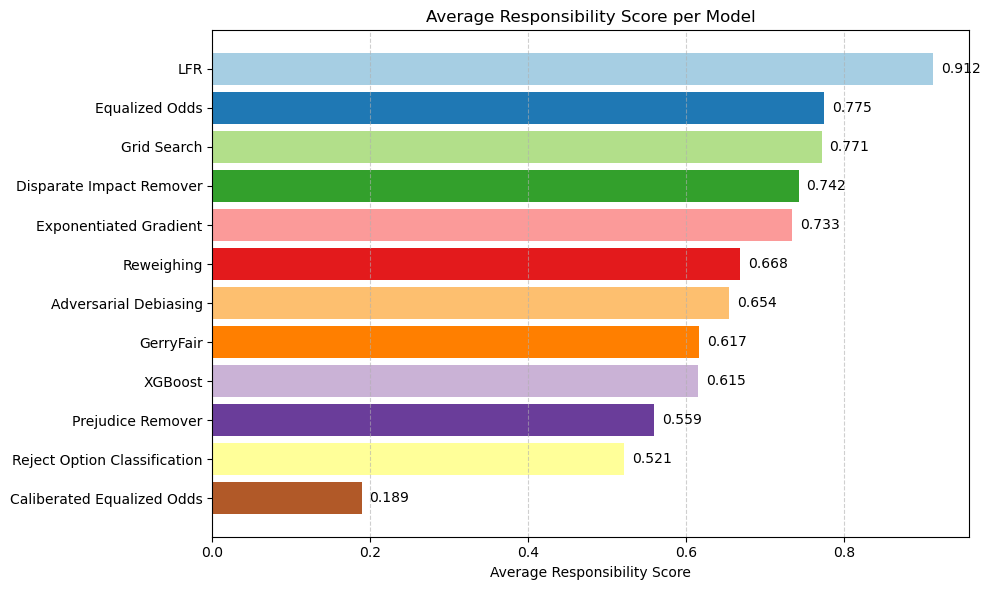

In [31]:
combined_df_sorted = pd.DataFrame({
    'Model': [
        'LFR', 'Equalized Odds', 'Grid Search', 'Disparate Impact Remover', 
        'Exponentiated Gradient', 'Reweighing', 'Adversarial Debiasing',
        'GerryFair', 'XGBoost', 'Prejudice Remover', 'Reject Option Classification', 
        'Caliberated Equalized Odds'
    ],
    'RS_Avg': [
        0.91205, 0.774675, 0.771225, 0.741975, 0.73335, 0.667625, 
        0.654375, 0.6165, 0.615025, 0.5593, 0.521225, 0.1887
    ]
})

print("🔵 Average Responsibility Score (RS) per Model:")
print(combined_df_sorted)

plt.figure(figsize=(10, 6))
plt.barh(combined_df_sorted['Model'], combined_df_sorted['RS_Avg'], color=plt.cm.Paired.colors)
plt.xlabel('Average Responsibility Score')
plt.title('Average Responsibility Score per Model')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for i, (score, model) in enumerate(zip(combined_df_sorted['RS_Avg'], combined_df_sorted['Model'])):
    plt.text(score + 0.01, i, f'{score:.3f}', va='center')

plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data = {
    'Group': ['Pre-processing', 'In-processing', 'Post-processing'],
    'Avg Accuracy': [0.9361, 0.6943, 0.6974],
    'Avg Disparate Impact': [0.9646, 0.7533, 236.7336],
    'Avg Statistical Parity Diff': [-0.0322, -0.0294, -0.0203],
    'Avg Equal Opportunity Diff': [-0.0107, -0.0320, -0.0107],
    'Avg RS': [0.774, 0.649, 0.495]
}

df = pd.DataFrame(data)
df['DI Clipped'] = df['Avg Disparate Impact'].apply(lambda x: min(x, 2.0))

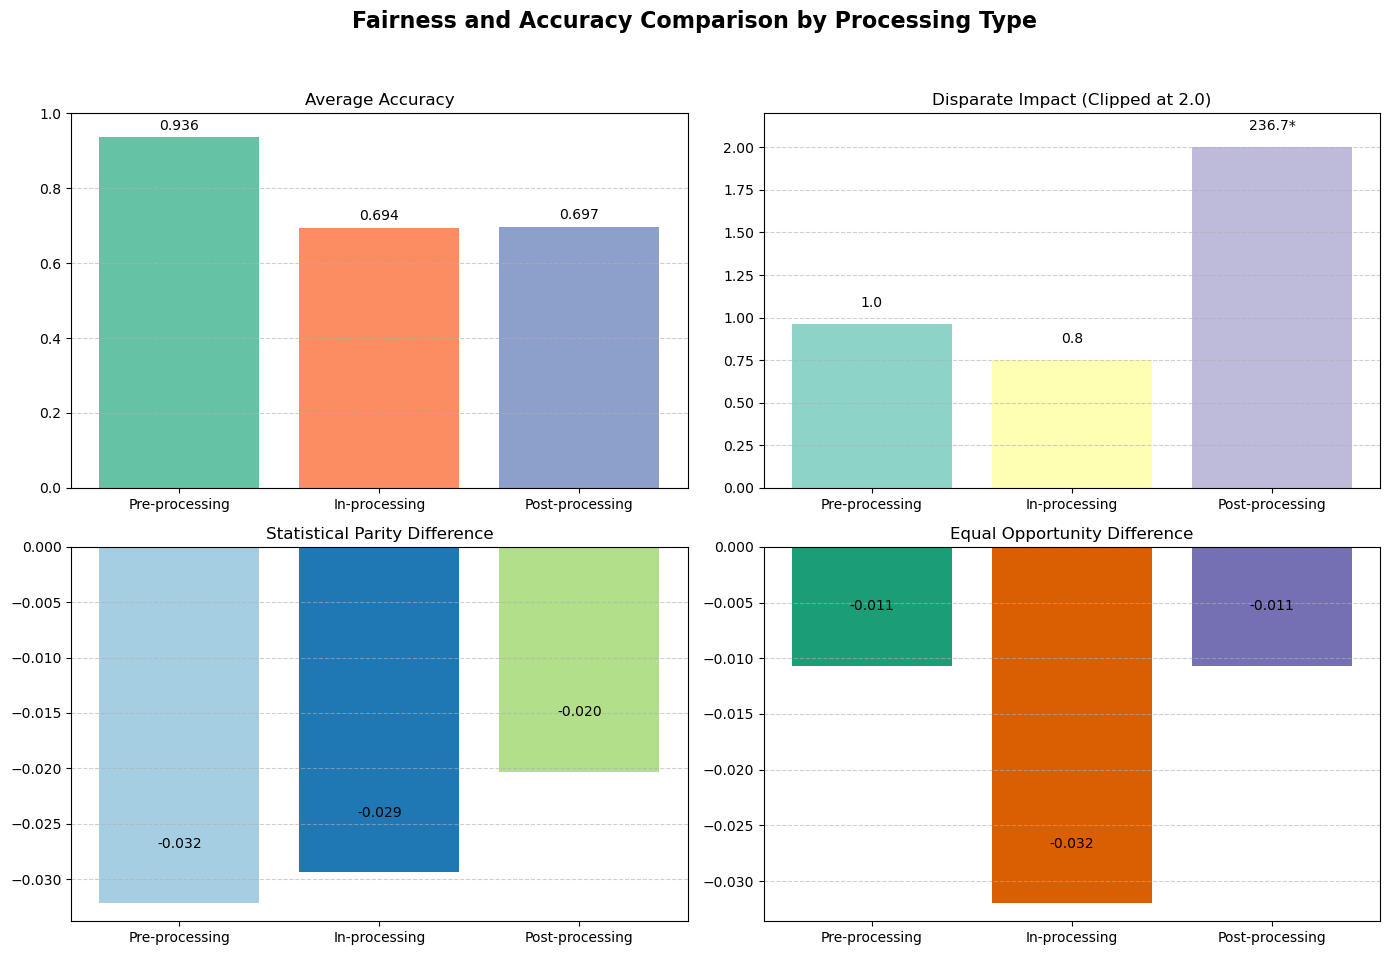

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Fairness and Accuracy Comparison by Processing Type', fontsize=16, fontweight='bold')

# Accuracy
axs[0, 0].bar(df['Group'], df['Avg Accuracy'], color=plt.cm.Set2.colors)
axs[0, 0].set_title('Average Accuracy')
axs[0, 0].set_ylim(0, 1)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(df['Avg Accuracy']):
    axs[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center')

# Disparate Impact (clipped view)
axs[0, 1].bar(df['Group'], df['DI Clipped'], color=plt.cm.Set3.colors)
axs[0, 1].set_title('Disparate Impact (Clipped at 2.0)')
axs[0, 1].set_ylim(0, 2.2)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.6)
for i, (true_val, clip_val) in enumerate(zip(df['Avg Disparate Impact'], df['DI Clipped'])):
    label = f"{true_val:.1f}" + ("*" if true_val > 2.0 else "")
    axs[0, 1].text(i, clip_val + 0.1, label, ha='center')

# 3. SPD
axs[1, 0].bar(df['Group'], df['Avg Statistical Parity Diff'], color=plt.cm.Paired.colors)
axs[1, 0].set_title('Statistical Parity Difference')
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(df['Avg Statistical Parity Diff']):
    axs[1, 0].text(i, v + 0.005, f'{v:.3f}', ha='center')

# 4. EOD
axs[1, 1].bar(df['Group'], df['Avg Equal Opportunity Diff'], color=plt.cm.Dark2.colors)
axs[1, 1].set_title('Equal Opportunity Difference')
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.6)
for i, v in enumerate(df['Avg Equal Opportunity Diff']):
    axs[1, 1].text(i, v + 0.005, f'{v:.3f}', ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

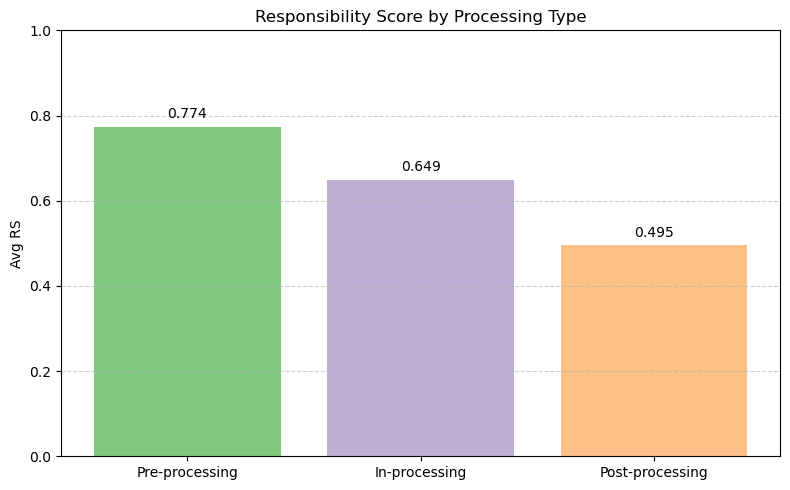

In [39]:
plt.figure(figsize=(8, 5))
plt.bar(df['Group'], df['Avg RS'], color=plt.cm.Accent.colors)
plt.title('Responsibility Score by Processing Type')
plt.ylabel('Avg RS')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars
for i, (score, label) in enumerate(zip(df['Avg RS'], df['Group'])):
    plt.text(i, score + 0.02, f'{score:.3f}', ha='center')

plt.tight_layout()
plt.show()